In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
# Load the dataset (replace 'Mall_Customers.csv' with the path to your dataset if it's a local file)
df = pd.read_csv('/content/Mall_Customers .csv')

In [ ]:
# Display the first few rows of the dataset
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
# Selecting the relevant features (Annual Income and Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
# Using the Elbow Method to determine the optimal number of clusters
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

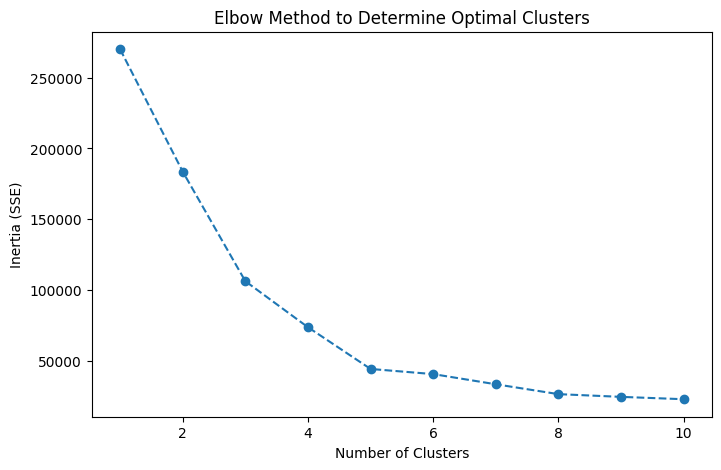

In [ ]:
# Plotting the Elbow Method graph
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.show()

# Applying K-means clustering with an optimal number of 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

In [ ]:
from sklearn.metrics import silhouette_score

# Evaluating the clustering with Silhouette Score
silhouette_avg = silhouette_score(X, df['Cluster'])
print(f'Silhouette Score for 5 clusters: {silhouette_avg}')

Silhouette Score for 5 clusters: 0.553931997444648


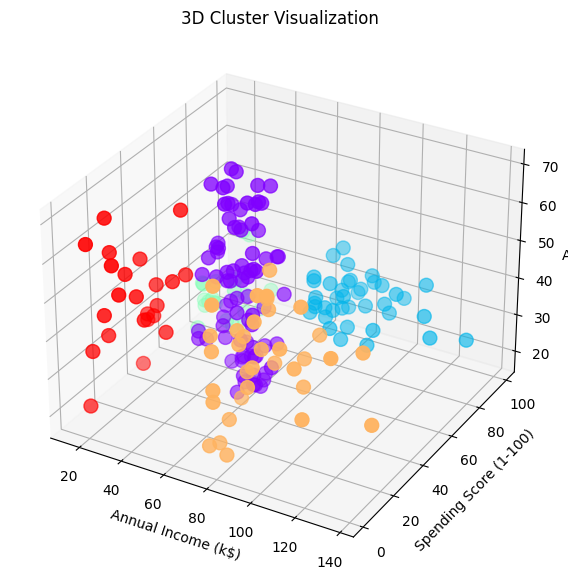

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], df['Age'],
                     c=df['Cluster'], cmap='rainbow', s=100)
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age')
plt.title('3D Cluster Visualization')
plt.show()

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans

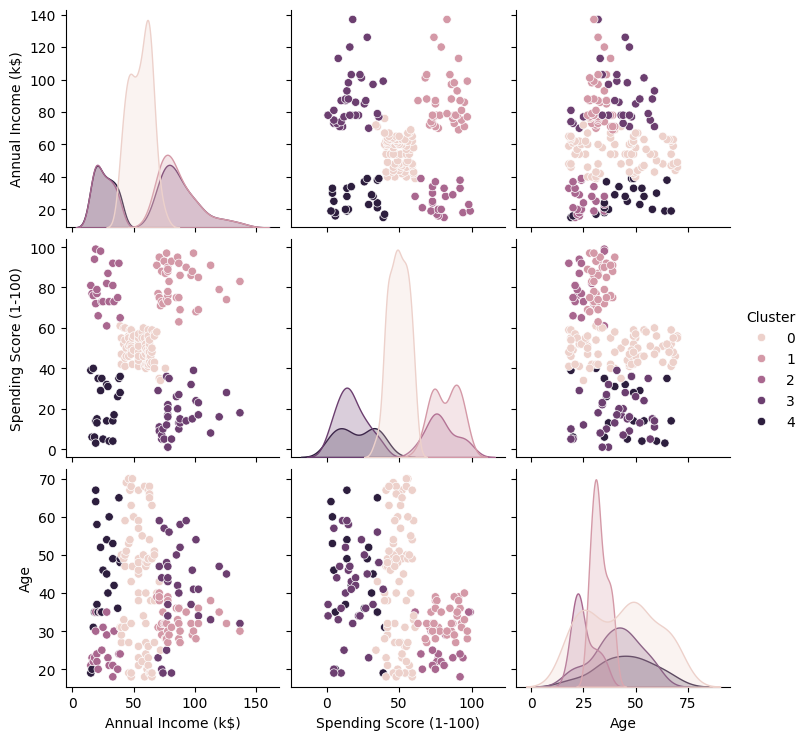

In [ ]:
# Pairplot to see pairwise relationships
sns.pairplot(df, hue='Cluster', vars=['Annual Income (k$)', 'Spending Score (1-100)', 'Age'])
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [ ]:
# Selecting the relevant features (Annual Income and Spending Score)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Applying K-means clustering with 5 clusters (based on elbow method)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Evaluating the clustering with multiple metrics
silhouette_avg = silhouette_score(X, df['Cluster'])
calinski_harabasz = calinski_harabasz_score(X, df['Cluster'])
davies_bouldin = davies_bouldin_score(X, df['Cluster'])

# Print the evaluation metrics
print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')
print(f'Davies-Bouldin Index: {davies_bouldin}')

Silhouette Score: 0.553931997444648
Calinski-Harabasz Index: 247.35899338037288
Davies-Bouldin Index: 0.5725628995597082
